# Data Mining - Lasso Regression
Data Mining I expands predictive modeling into nonlinear dimensions, enhancing the capabilities and effectiveness of the data analytics lifecycle. In this course, learners implement supervised models—specifically classification and prediction data mining models—to unearth relationships among variables that are not apparent with more surface-level techniques. The course provides frameworks for assessing models’ sensitivity and specificity.

## Competencies 
__Classification Data Mining Models__ <br>
Applies observations to appropriate classes and categories using classification models. 

__Predictive Data Mining Models__ <br>
Implements prediction data mining models to find hard-to-spot relationships among variables.

__Data Mining Model Performance__ <br>
Evaluates data mining model performance for precision, accuracy, and model comparison.

## Write Up 
__Research Question__<br>
Can Lasso Regression be used to predict total charges for this specific hospital chain? 

__Goal__<br>
One goal of the data analysis is to determine if lasso regression method can produce a model that can predict total charge.  

__Explanation of Classification Method__<br>
The prediction method I chose is Lasso regression. Lasso regression helps to reduce model complexity, prevent overfitting, and help with feature selection.  This prediction method will analyze the data set by looking at the coefficients of less important features and shrinking them to zero while the more important features are focused on. (Bowne-Anderson, n.d.) The expected outcome will be a model that can make accurate predictions for the target continuous variable total charges. 

__Summary of Method Assumption__<br>
One assumption of the lasso regression prediction method has the same assumptions as linear models which includes linearity. (Elleh, 2022) Linearity is assuming that the relationship between the predictor variables (X) and the target variables (y) are linear.

## Code

In [1]:
# Importing packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno 
import seaborn as sns

In [2]:
# Importing medical data CSV and creating the medical_data DataFrame
medical_data = pd.read_csv("C:/Users/Makayla Avendano/Desktop/medical_clean.csv")

In [3]:
# Looking at columns, non-null counts and data types 
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [4]:
# Drop columns that are not needed 
medical_data = medical_data.drop(columns=['Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'Marital', 'TimeZone', 'Job', 'CaseOrder', 'Customer_id','Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8'])

In [5]:
# Updated data frame 
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Children            10000 non-null  int64  
 1   Age                 10000 non-null  int64  
 2   Income              10000 non-null  float64
 3   Gender              10000 non-null  object 
 4   ReAdmis             10000 non-null  object 
 5   VitD_levels         10000 non-null  float64
 6   Doc_visits          10000 non-null  int64  
 7   Full_meals_eaten    10000 non-null  int64  
 8   vitD_supp           10000 non-null  int64  
 9   Soft_drink          10000 non-null  object 
 10  Initial_admin       10000 non-null  object 
 11  HighBlood           10000 non-null  object 
 12  Stroke              10000 non-null  object 
 13  Complication_risk   10000 non-null  object 
 14  Overweight          10000 non-null  object 
 15  Arthritis           10000 non-null  object 
 16  Diabe

In [6]:
# Duplicates 
medical_duplicates = medical_data.duplicated()
print(medical_duplicates.value_counts())

False    10000
Name: count, dtype: int64


In [7]:
# Missing Values 
# Sum of all null values within each column 
medical_data.isnull().sum()

Children              0
Age                   0
Income                0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charges    0
dtype: int64

<Axes: >

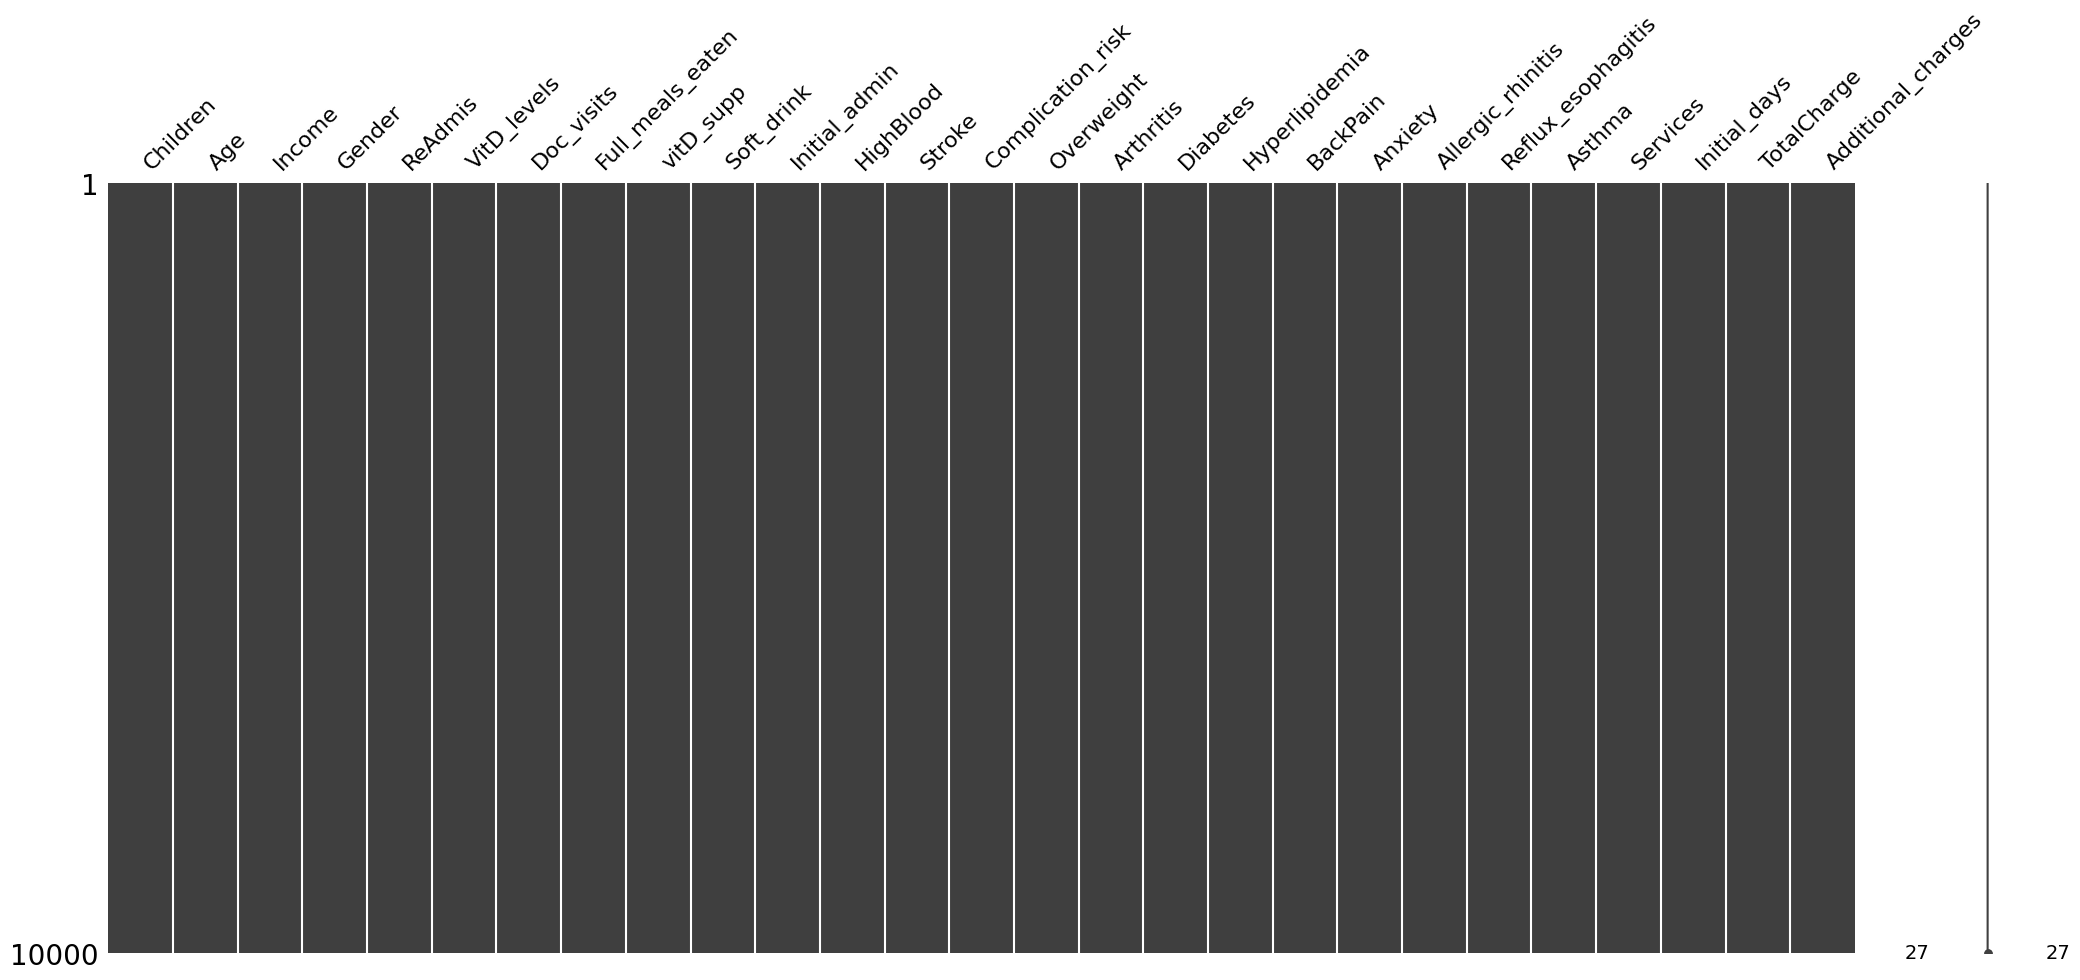

In [8]:
# Double checking no missing values 
msno.matrix(medical_data) 

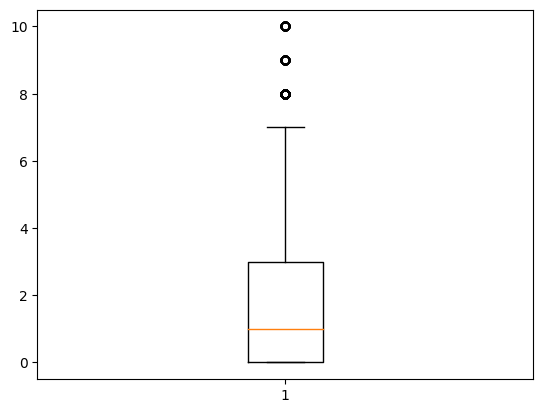

In [9]:
# Outliers
ChildrenPlot = plt.boxplot(x='Children', data = medical_data)

In [10]:
# Treat outliers with imputation - Finding the maximuim value for the box plot (upper outliers) 
Q3_children = np.percentile(medical_data['Children'], 75)
Q1_children = np.percentile(medical_data['Children'], 25)
IQR_children = Q3_children - Q1_children
Max_children = Q3_children + (1.5 * IQR_children)
print(Max_children)

7.5


In [11]:
# Replacing with the median
median = float(medical_data['Children'].median())
medical_data['Children'] = np.where(medical_data['Children'] > Max_children, median, medical_data['Children'])

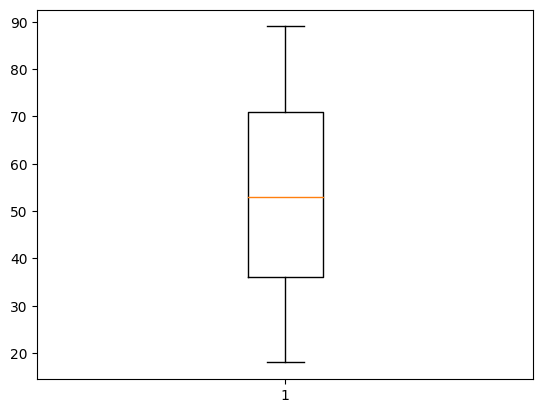

In [12]:
AgePlot = plt.boxplot(x='Age', data = medical_data)

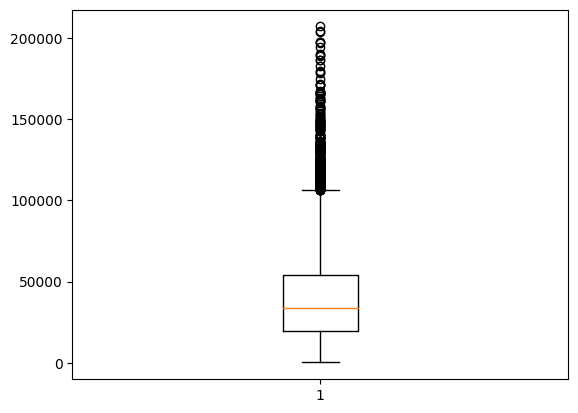

In [13]:
IncomePlot = plt.boxplot(x='Income', data = medical_data)

In [14]:
# Treat outliers with imputation - Finding the maximuim value for the box plot (upper outliers) 
Q3_income = np.percentile(medical_data['Income'], 75)
Q1_income = np.percentile(medical_data['Income'], 25)
IQR_income = Q3_income - Q1_income
Max_income = Q3_income + (1.5 * IQR_income)
print(Max_income)

106342.84374999999


In [15]:
# Replacing with the median
median = float(medical_data['Income'].median())
medical_data['Income'] = np.where(medical_data['Income'] > Max_income, median, medical_data['Income'])

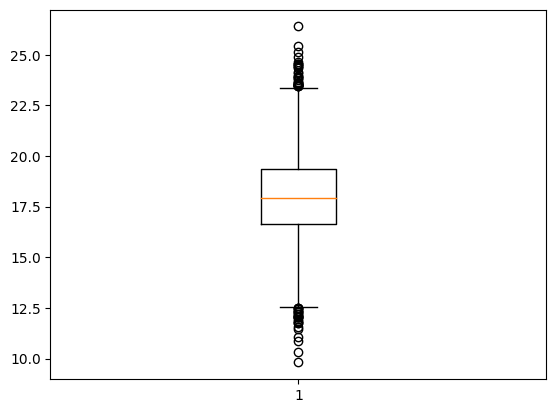

In [16]:
VitDlevelsplot = plt.boxplot(x='VitD_levels', data = medical_data)

In [17]:
# Treat outliers with imputation - Finding the maximuim value for the box plot (upper outliers) 
Q3_vitd = np.percentile(medical_data['VitD_levels'], 75)
Q1_vitd = np.percentile(medical_data['VitD_levels'], 25)
IQR_vitd = Q3_vitd - Q1_vitd
Max_vitd = Q3_vitd + (1.5 * IQR_vitd)
rounded_max_vitd = round(Max_vitd,1)
print(rounded_max_vitd)

23.4


In [18]:
# Treat outliers with imputation - Finding the maximuim value for the box plot (lower outliers) 
Q3_vitd = np.percentile(medical_data['VitD_levels'], 75)
Q1_vitd = np.percentile(medical_data['VitD_levels'], 25)
IQR_vitd = Q3_vitd - Q1_vitd
Min_vitd = Q1_vitd - (1.5 * IQR_vitd)
rounded_min_vitd = round(Min_vitd,1)
print(rounded_min_vitd)

12.5


In [19]:
# Replacing with the median
median = float(medical_data['VitD_levels'].median())
medical_data['VitD_levels'] = np.where(medical_data['VitD_levels'] > rounded_max_vitd, median, medical_data['VitD_levels'])

In [20]:
# Replacing with the median
median = float(medical_data['VitD_levels'].median())
medical_data['VitD_levels'] = np.where(medical_data['VitD_levels'] < rounded_min_vitd, median, medical_data['VitD_levels'])

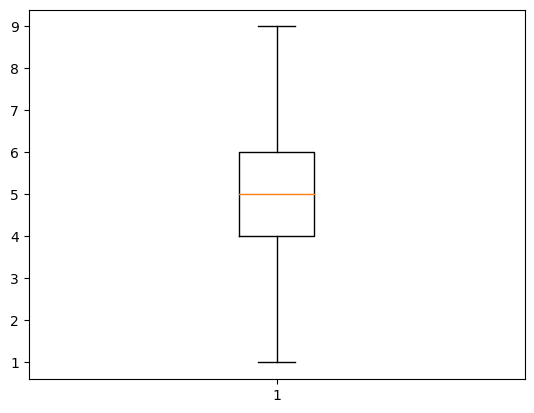

In [21]:
Docvisitsplot = plt.boxplot(x='Doc_visits', data = medical_data)

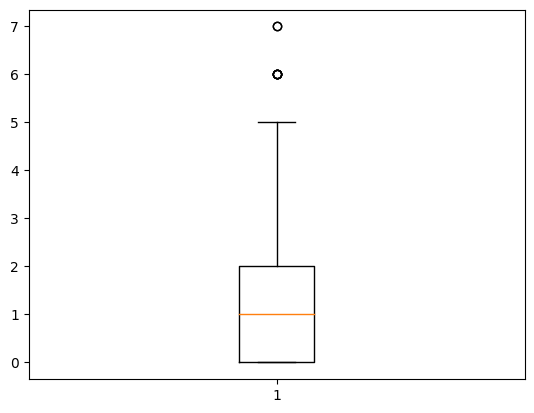

In [22]:
Fullsmealseatenplot = plt.boxplot(x='Full_meals_eaten', data = medical_data)

In [23]:
# Treat outliers with imputation - Finding the maximuim value for the box plot (upper outliers) 
Q3_meals = np.percentile(medical_data['Full_meals_eaten'], 75)
Q1_meals = np.percentile(medical_data['Full_meals_eaten'], 25)
IQR_meals = Q3_vitd - Q1_vitd
Max_meals = Q3_vitd + (1.5 * IQR_vitd)
rounded_max_meals = round(Max_meals,1)
print(rounded_max_meals)

23.4


In [24]:
# Replacing with the median
median = float(medical_data['Full_meals_eaten'].median())
medical_data['Full_meals_eaten'] = np.where(medical_data['Full_meals_eaten'] > rounded_max_meals, median, medical_data['Full_meals_eaten'])

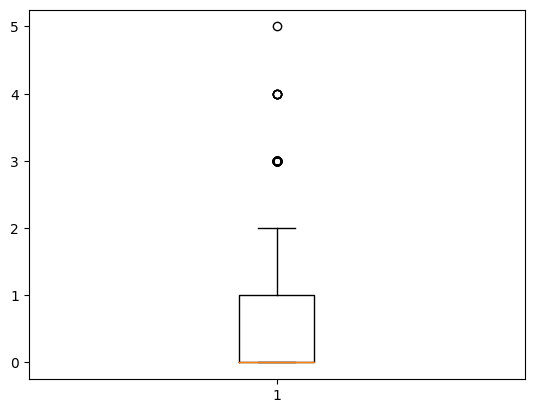

In [25]:
VitDSuppplot = plt.boxplot(x='vitD_supp', data = medical_data)

In [26]:
# Treat outliers with imputation - Finding the maximuim value for the box plot (upper outliers) 
Q3_supp = np.percentile(medical_data['vitD_supp'], 75)
Q1_supp = np.percentile(medical_data['vitD_supp'], 25)
IQR_supp = Q3_supp - Q1_supp
Max_supp = Q3_supp + (1.5 * IQR_supp)
rounded_max_supp = round(Max_supp,1)
print(rounded_max_supp)

2.5


In [27]:
# Replacing with the median
median = float(medical_data['vitD_supp'].median())
medical_data['vitD_supp'] = np.where(medical_data['vitD_supp'] > rounded_max_supp, median, medical_data['vitD_supp'])

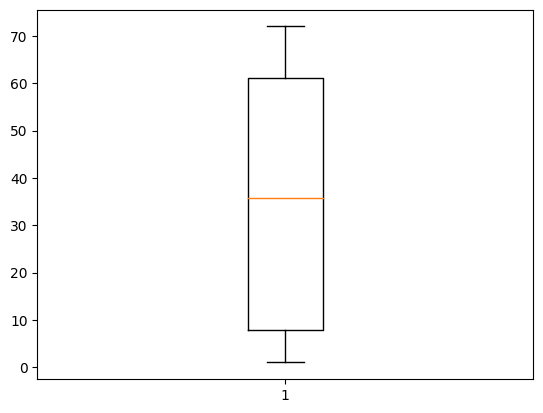

In [28]:
Initialdaysplot = plt.boxplot(x='Initial_days', data = medical_data)

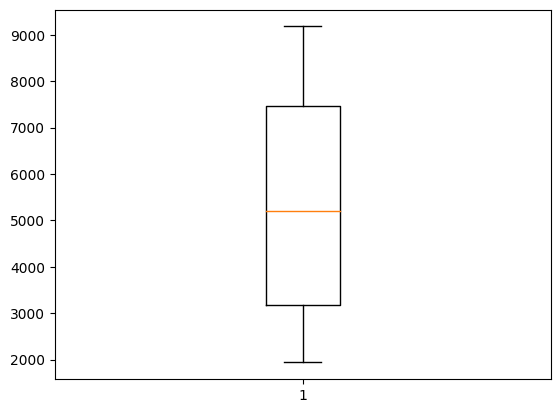

In [29]:
TotalChargePlot = plt.boxplot(x='TotalCharge', data = medical_data)

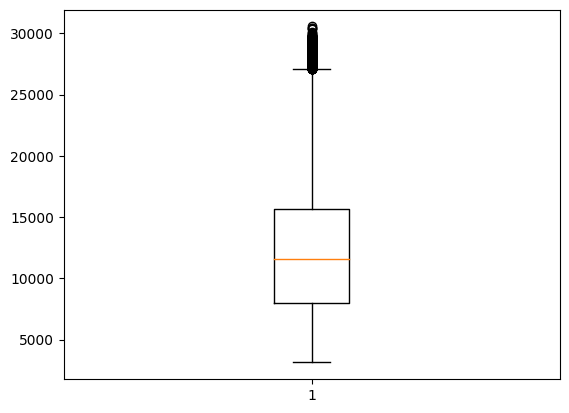

In [30]:
AddPlot = plt.boxplot(x='Additional_charges', data = medical_data)

In [31]:
# Treat outliers with imputation - Finding the maximuim value for the box plot (upper outliers) 
Q3_add = np.percentile(medical_data['Additional_charges'], 75)
Q1_add = np.percentile(medical_data['Additional_charges'], 25)
IQR_add = Q3_add - Q1_add
Max_add = Q3_add + (1.5 * IQR_add)
rounded_max_add = round(Max_add,1)
print(rounded_max_add)

27086.5


In [32]:
# Replacing with the median
median = float(medical_data['Additional_charges'].median())
medical_data['Additional_charges'] = np.where(medical_data['Additional_charges'] > rounded_max_add, median, medical_data['Additional_charges'])

In [33]:
# Exploratory
# EDA - Looking at descriptive statistics
medical_data.describe()

,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.779900,53.511700,37355.193095,17.958778,5.012200,1.001400,0.377200,34.455299,5312.172769,12224.131644
std,1.673361,20.638538,22986.930317,1.962375,1.045734,1.008117,0.586306,26.309341,2180.393838,5683.843249
min,0.000000,18.000000,154.080000,12.507730,1.000000,0.000000,0.000000,1.001981,1938.312067,3125.703000
25%,0.000000,36.000000,19598.775000,16.642449,4.000000,0.000000,0.000000,7.896215,3179.374015,7986.487755
50%,1.000000,53.000000,33766.005000,17.951074,5.000000,1.000000,0.000000,35.836244,5213.952000,11573.938868
75%,3.000000,71.000000,51024.942500,19.325515,6.000000,2.000000,1.000000,61.161020,7459.699750,14654.504410
max,7.000000,89.000000,106220.500000,23.363658,9.000000,7.000000,2.000000,71.981490,9180.728000,27059.629700


In [34]:
# Qualitative/categorical descriptive data
medical_data.describe(include='object')

,Gender,ReAdmis,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,3,2,2,3,2,2,3,2,2,2,2,2,2,2,2,2,4
top,Female,No,No,Emergency Admission,No,No,Medium,Yes,No,No,No,No,No,No,No,No,Blood Work
freq,5018,6331,7425,5060,5910,8007,4517,7094,6426,7262,6628,5886,6785,6059,5865,7107,5265


In [35]:
# Data Wrangling 
# 1. Create new column to input into 
medical_data['ReAdmis_numeric'] = medical_data['ReAdmis']
# 2. Create dictionary for the values 
dict_readmis = {"ReAdmis_numeric": {"Yes": 1, "No": 0}}
medical_data.replace(dict_readmis, inplace = True)

In [36]:
# Data Wrangling 
# 1. Create new column to input into 
medical_data['HighBlood_numeric'] = medical_data['HighBlood']
# 2. Create dictionary for the values 
dict_highblood = {"HighBlood_numeric": {"Yes": 1, "No": 0}}
medical_data.replace(dict_highblood, inplace = True)

In [37]:
# Data Wrangling 
# 1. Create new column to input into 
medical_data['Soft_drink_numeric'] = medical_data['Soft_drink']
# 2. Create dictionary for the values 
dict_soft = {"Soft_drink_numeric": {"Yes": 1, "No": 0}}
medical_data.replace(dict_soft, inplace = True)

In [38]:
# Data Wrangling 
# 1. Create new column to input into 
medical_data['Stroke_numeric'] = medical_data['Stroke']
# 2. Create dictionary for the values 
dictstroke = {"Stroke_numeric": {"Yes": 1, "No": 0}}
medical_data.replace(dictstroke, inplace = True)

In [39]:
# Data Wrangling 
# 1. Create new column to input into 
medical_data['Overweight_numeric'] = medical_data['Overweight']
# 2. Create dictionary for the values 
dictover = {"Overweight_numeric": {"Yes": 1, "No": 0}}
medical_data.replace(dictover, inplace = True)

In [40]:
# Data Wrangling 
# 1. Create new column to input into 
medical_data['Arthritis_numeric'] = medical_data['Arthritis']
# 2. Create dictionary for the values 
dictarth = {"Arthritis_numeric": {"Yes": 1, "No": 0}}
medical_data.replace(dictarth, inplace = True)

In [41]:
# Data Wrangling 
# 1. Create new column to input into 
medical_data['Diabetes_numeric'] = medical_data['Diabetes']
# 2. Create dictionary for the values 
dictdib = {"Diabetes_numeric": {"Yes": 1, "No": 0}}
medical_data.replace(dictdib, inplace = True)

In [42]:
# Data Wrangling 
# 1. Create new column to input into 
medical_data['Hyperlipidemia_numeric'] = medical_data['Hyperlipidemia']
# 2. Create dictionary for the values 
dicthyp = {"Hyperlipidemia_numeric": {"Yes": 1, "No": 0}}
medical_data.replace(dicthyp, inplace = True)

In [43]:
# Data Wrangling 
# 1. Create new column to input into 
medical_data['BackPain_numeric'] = medical_data['BackPain']
# 2. Create dictionary for the values 
dictback = {"BackPain_numeric": {"Yes": 1, "No": 0}}
medical_data.replace(dictback, inplace = True)

In [44]:
# Data Wrangling 
# 1. Create new column to input into 
medical_data['Anxiety_numeric'] = medical_data['Anxiety']
# 2. Create dictionary for the values 
dictanx = {"Anxiety_numeric": {"Yes": 1, "No": 0}}
medical_data.replace(dictanx, inplace = True)

In [45]:
# Data Wrangling 
# 1. Create new column to input into 
medical_data['Allergic_rhinitis_numeric'] = medical_data['Allergic_rhinitis']
# 2. Create dictionary for the values 
dictallerg = {"Allergic_rhinitis_numeric": {"Yes": 1, "No": 0}}
medical_data.replace(dictallerg, inplace = True)

In [46]:
# Data Wrangling 
# 1. Create new column to input into 
medical_data['Reflux_esophagitis_numeric'] = medical_data['Reflux_esophagitis']
# 2. Create dictionary for the values 
dictreflux = {"Reflux_esophagitis_numeric": {"Yes": 1, "No": 0}}
medical_data.replace(dictreflux, inplace = True)

In [47]:
# Data Wrangling 
# 1. Create new column to input into 
medical_data['Asthma_numeric'] = medical_data['Asthma']
# 2. Create dictionary for the values 
dictasthma = {"Asthma_numeric": {"Yes": 1, "No": 0}}
medical_data.replace(dictasthma, inplace = True)

In [48]:
# Data Wrangling 
# 1. Create new column to input into 
medical_data['Complication_risk_numeric'] = medical_data['Complication_risk']
# 2. Create dictionary for the values 
dictcompl = {"Complication_risk_numeric": {"High": 2, "Medium": 1, "Low": 0}}
medical_data.replace(dictcompl, inplace = True)

In [49]:
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Children                    10000 non-null  float64
 1   Age                         10000 non-null  int64  
 2   Income                      10000 non-null  float64
 3   Gender                      10000 non-null  object 
 4   ReAdmis                     10000 non-null  object 
 5   VitD_levels                 10000 non-null  float64
 6   Doc_visits                  10000 non-null  int64  
 7   Full_meals_eaten            10000 non-null  float64
 8   vitD_supp                   10000 non-null  float64
 9   Soft_drink                  10000 non-null  object 
 10  Initial_admin               10000 non-null  object 
 11  HighBlood                   10000 non-null  object 
 12  Stroke                      10000 non-null  object 
 13  Complication_risk           1000

In [50]:
# Drop all categorical variables that were re-expressed 
medical_data = medical_data.drop(columns=['HighBlood','Stroke','Complication_risk','Overweight','Anxiety','Arthritis','Diabetes', 'ReAdmis','Allergic_rhinitis','Reflux_esophagitis','Asthma','BackPain','Hyperlipidemia','Soft_drink'])

In [51]:
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Children                    10000 non-null  float64
 1   Age                         10000 non-null  int64  
 2   Income                      10000 non-null  float64
 3   Gender                      10000 non-null  object 
 4   VitD_levels                 10000 non-null  float64
 5   Doc_visits                  10000 non-null  int64  
 6   Full_meals_eaten            10000 non-null  float64
 7   vitD_supp                   10000 non-null  float64
 8   Initial_admin               10000 non-null  object 
 9   Services                    10000 non-null  object 
 10  Initial_days                10000 non-null  float64
 11  TotalCharge                 10000 non-null  float64
 12  Additional_charges          10000 non-null  float64
 13  ReAdmis_numeric             1000

In [52]:
# Using get dummies pandas function to get numerical values for the 3 nominal categorical variables
medical_data = pd.get_dummies(medical_data, columns=['Services', 'Gender', 'Initial_admin'], prefix='New', dtype='int')
medical_data.head()

,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges,...,New_Blood Work,New_CT Scan,New_Intravenous,New_MRI,New_Female,New_Male,New_Nonbinary,New_Elective Admission,New_Emergency Admission,New_Observation Admission
0,1.0,53,86575.93,19.141466,6,0.0,0.0,10.585770,3726.702860,17939.403420,...,1,0,0,0,0,1,0,0,1,0
1,3.0,51,46805.99,18.940352,4,2.0,1.0,15.129562,4193.190458,17612.998120,...,0,0,1,0,1,0,0,0,1,0
2,3.0,53,14370.14,18.057507,4,1.0,0.0,4.772177,2434.234222,17505.192460,...,1,0,0,0,1,0,0,1,0,0
3,0.0,78,39741.49,16.576858,4,1.0,0.0,1.714879,2127.830423,12993.437350,...,1,0,0,0,0,1,0,1,0,0
4,1.0,22,1209.56,17.439069,5,0.0,2.0,1.254807,2113.073274,3716.525786,...,0,1,0,0,1,0,0,1,0,0


In [53]:
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Children                    10000 non-null  float64
 1   Age                         10000 non-null  int64  
 2   Income                      10000 non-null  float64
 3   VitD_levels                 10000 non-null  float64
 4   Doc_visits                  10000 non-null  int64  
 5   Full_meals_eaten            10000 non-null  float64
 6   vitD_supp                   10000 non-null  float64
 7   Initial_days                10000 non-null  float64
 8   TotalCharge                 10000 non-null  float64
 9   Additional_charges          10000 non-null  float64
 10  ReAdmis_numeric             10000 non-null  int64  
 11  HighBlood_numeric           10000 non-null  int64  
 12  Soft_drink_numeric          10000 non-null  int64  
 13  Stroke_numeric              1000

In [54]:
# Export CSV file 
medical_data.to_csv("C:/Users/Makayla Avendano/Desktop/new_med_data_209_task2.csv")

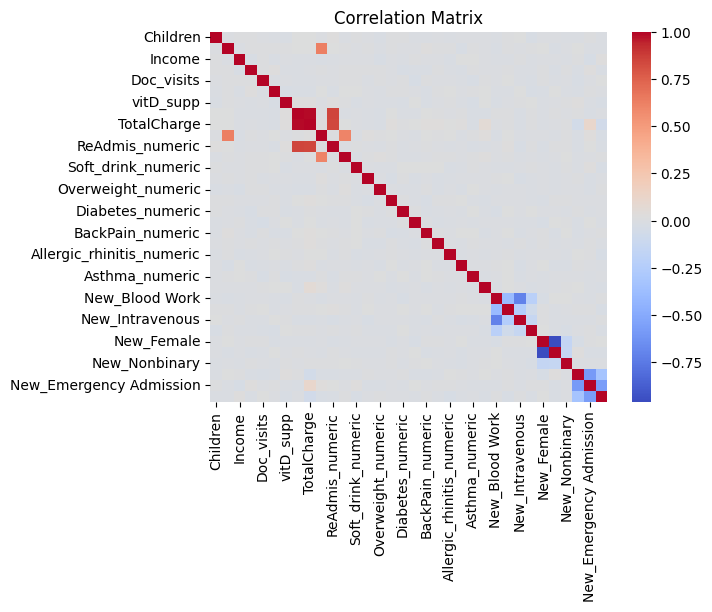

In [55]:
# Correlation matrix 
corr_matrix = medical_data.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define variables
X = medical_data.drop('TotalCharge',axis=1)
y = medical_data['TotalCharge']

# Split data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [57]:
# Export train/test sets
X_train.to_csv("C:/Users/Makayla Avendano/Desktop/X_train.csv")
X_test.to_csv("C:/Users/Makayla Avendano/Desktop/X_test.csv")
y_train.to_csv("C:/Users/Makayla Avendano/Desktop/y_train.csv")
y_test.to_csv("C:/Users/Makayla Avendano/Desktop/y_test.csv")

In [58]:
# Define variables
X = medical_data.drop('TotalCharge',axis=1).values
y = medical_data['TotalCharge'].values

# Normalize data 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Define grid of candidate alpha values
param_grid = {"alpha": 10.0 ** np.arange(-5,6)}

# Create the model 
lasso = Lasso()

# GridSearchCV for hyperparameter tuning 
grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid)
grid_search_lasso.fit(X_train,y_train)

# Alpha parameter results
best_alpha = grid_search_lasso.best_params_['alpha']
best_score = grid_search_lasso.best_score_

# Training the model 
lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)


# Evaluating the model 
train_score = lasso.score(X_train, y_train)
test_score = lasso.score(X_test, y_test)
print(f"Training Set Score (R-squared): {train_score:.4f}")
print(f"Test Set Score (R-squared): {test_score:.4f}")

Training Set Score (R-squared): 0.9978
Test Set Score (R-squared): 0.9978


In [59]:
# Alpha parameter results 
print(f"Best Alpha: {best_alpha}")
print(f"Best Score: {best_score}")

Best Alpha: 0.1
Best Score: 0.9978233805905405


In [60]:
# MSE, RMSE, R-squared 
mse = mean_squared_error(y_test, lasso_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, lasso_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Mean Squared Error (MSE): 10334.9392
Root Mean Squared Error (RMSE): 101.6609
R-squared (R2): 0.9978


In [61]:
lasso_coef = lasso.coef_
feature_names = medical_data.drop('TotalCharge', axis=1).columns

print("Lasso Coefficients:")
for feature, coefficient in zip(feature_names, lasso_coef):
    print(f"{feature}: {coefficient:.4f}")

Lasso Coefficients:
Children: -0.7603
Age: 1.6111
Income: 0.7337
VitD_levels: -1.0187
Doc_visits: 0.7649
Full_meals_eaten: 0.3418
vitD_supp: 1.6220
Initial_days: 2162.7771
Additional_charges: -2.7147
ReAdmis_numeric: -3.7415
HighBlood_numeric: 54.9430
Soft_drink_numeric: -0.0000
Stroke_numeric: -0.0000
Overweight_numeric: -1.6087
Arthritis_numeric: 32.4999
Diabetes_numeric: 33.2649
Hyperlipidemia_numeric: 43.6299
BackPain_numeric: 42.4945
Anxiety_numeric: 38.8821
Allergic_rhinitis_numeric: 31.7058
Reflux_esophagitis_numeric: 30.2119
Asthma_numeric: 0.0000
Complication_risk_numeric: 166.3628
New_Blood Work: 0.0000
New_CT Scan: -0.4777
New_Intravenous: 0.6160
New_MRI: -1.1968
New_Female: 1.5904
New_Male: -0.0000
New_Nonbinary: -0.0487
New_Elective Admission: -87.4865
New_Emergency Admission: 154.7731
New_Observation Admission: -90.0343


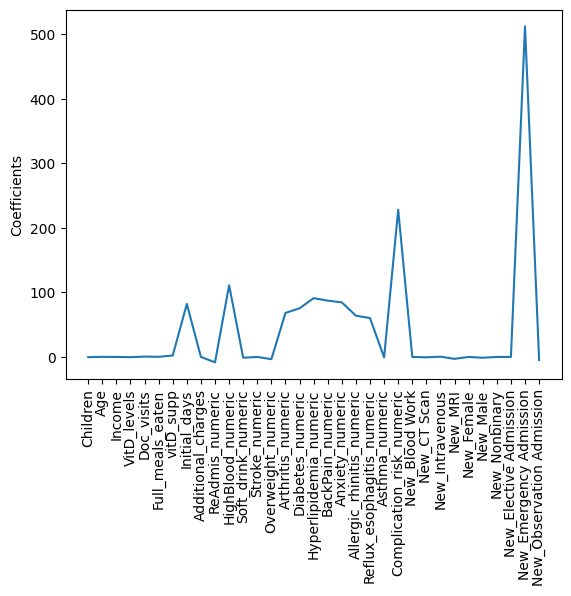

In [62]:
# Lasso feature selection visualization 
features = medical_data.drop('TotalCharge',axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X,y).coef_
plt.plot(range(len(features)),lasso_coef)
plt.xticks(range(len(features)), features, rotation=90) 
plt.ylabel('Coefficients')
plt.show()

## Explanation of Steps
The analysis technique that was used to analyze the data was lasso regression. The first calculation performed to prepare the model was the imputation of outliers using the median. The maximum value was calculated using the equation Q3 + (1.5 * IQR) and the minimum was calculated using the equation Q1 – (1.5 * IQR). These calculations were performed and then the where function was used to replace all values above the maximum and below the minimum with the median. 

Next, the re-expression of ordinal categorical variables. A new column to input data into was created, a dictionary was created where yes was equal to one and no was equal to zero (except for complication risk), and the data was then inputted into the new column. Then, the re-expression of nominal categorical variables using the get dummies function in pandas. 

The data was then split into 80% training set and 20% for the test set. Next, the model was developed. Variables were indicated first and then the data was normalized using StandardScaler. The parameter grid for grid search cross validation was defined and the lasso model was created. Grid search cross validation was performed and then we began to train the model. Lastly, the model was evaluated. The best alpha parameter results were calculated from the grid search cross validation. Mean squared error, the root mean squared error, and r-squared were then calculated to determine the accuracy of the prediction model. The lasso coefficients were then shown looking at the coefficient values and an added visual. 

## Data Summary and Implications 
Mean Squared Error (MSE): 10334.9392
Root Mean Squared Error (RMSE): 101.6609
R-squared (R2): 0.9978

The mean squared error (MSE), “is the sum of squares differences between the predicted values and the actual values. It determines how good the estimate is based on the algorithm analysis.” (Elleh, 2022) The root mean squared error (RMSE) is the square root of the MSE and has the same units as our dependent variable total charges making this value easier to interpret. The RMSE of around 102 indicates that the predicted total charges and the actual total charges have an error of around 102. The MSE and RMSE can reveal the degree of error and how significant it is in reference to the model. The R-squared, “metric tells how well a model fits the data. It ranges between 0 and 1. Higher R-squared, the better the model fits the data.” (Elleh, 2022) The R-squared for our model is almost 1 meaning the model fits the data extremely well. 


Lasso Regression was used for this analysis. The model that was developed had an R-squared of 0.99 which indicates that our model fits our data very well. The root mean square (RMSE) was 102 which is relatively high and indicates that predictions of total charges are inaccurate by $102. Even though the RMSE is 102, if we compare it to the median value of total charges (5312) it is still relatively small indicating a smaller prediction error. Instead of using SelectKBest for feature selection, lasso regression uses shrinkage to shrink the coefficients that are of less importance. In contrast, the coefficients that are most importance will get larger like Initial_days with a value of 2162.8 and Complication_risk with a value of 166.4. 

GridSearchCV is the hyperparameter tuning method that was used to determine the best alpha value. The alpha value that was determined was 0.1 and with this value of alpha the highest model score would be 0.99. Due to the score being high, we can assume that hyperparameter tuning worked efficiently and reduced the risk of overfitting the model. (Bowne-Anderson, n.d) Another thing to note would be that the best alpha value was 0.1 which is on the lower end meaning that the model had a lower complexity value. (Bowne-Anderson, n.d). 

## Limitations 
One important limitation of lasso regression is instability with correlated features. “What usually happens is that one of the features gets selected somewhat arbitrarily and all of the other features that are highly correlated with that feature get effectively dropped from the model.” (Ellis, 2021) This means that if there is any correlation within the data, the automatic feature selection built within lasso could potentially misinterpret these correlated features. 

## Course of Action
With the results indicated in E2, I believe that this model can be used to predict total charges within this hospital. Although the RMSE is 102, this value is relatively small compared to the median value of total charges which is 5312. This hospital can use this model to focus on those high value lasso coefficients to determine which variables are the most influential on total charges. This model can also give the hospital good insight into the hospital’s income and adjust it as necessary. 